In [1]:
#import the required libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# 1. Load Data

In [2]:
# load CSV data into data frame.
df = pd.read_csv('Cars.csv')

# Check the first five rows of the data to see the overall data structure.
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
# Check the number of data records, potential features + one label
df.shape

(8128, 13)

In [4]:
# Check the column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## 1.2 Converting data types

### There are some features that can be converted into numerical types.
- "CNG" and "LPG" will be removed because they use a different mileage system. other wise. their unit will cause problems.
- Drop torque column since the company doesn't understand this data.
- "kmpl” will be removed from the mileage column and convert the column to float type
- “CC” will be removed from the engine column and convert the column to float type
- “bhp” will be removed from the max power column and convert the column to float type

In [6]:
# remove "CNG" and "LPG"
CNG_and_LPG = np.logical_or(df['fuel'] == 'CNG', df['fuel'] == 'LPG')
df.drop(df[CNG_and_LPG].index, inplace=True)

# Drop the torque column
df.drop(['torque'],axis=1,inplace=True)

# remove “kmpl”
df['mileage'] = df.mileage.str.split(' ').str.get(0).astype(dtype='float')

# remove “CC”
df['engine'] = df.engine.str.split(' ').str.get(0).astype(dtype='float')

# remove “bhp”
df['max_power'] = df.max_power.str.split(' ').str.get(0).astype(dtype='float')

#### Also drop the record of 'Test Drive Car'. Since they have very high selling price.

In [7]:
df[df['owner'] == 'Test Drive Car']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4383,Volkswagen Vento 1.5 TDI Highline BSIV,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.27,1498.0,108.60,5.0
4950,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0
4951,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0
4952,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0
6220,Honda Civic ZX,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,16.50,1799.0,139.46,5.0


In [8]:
df.drop(df[df['owner'] == 'Test Drive Car'].index, inplace = True)

In [9]:
# Check the table again if the values are transformed correctly.
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [10]:
# Check if the data types are updated.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   object 
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 815.3+ KB


### Get the brand from the name and change the column name.

In [11]:
brand = df.name.str.split(' ').str.get(0)
df.insert(3,"brand",brand)
df.drop(['name'],axis=1,inplace=True)
df.head(5)

,year,selling_price,brand,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,Maruti,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,Skoda,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,Honda,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,Hyundai,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,Maruti,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


selling_price column is the target label. The rest are potential features we might use in our model.

### Overview overall statistics of each columns, range, mean, min, max values etc.

In [12]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8028.000000,8.028000e+03,8.028000e+03,7814.000000,7814.000000,7820.000000,7814.000000
mean,2013.815521,6.403937e+05,6.977314e+04,19.391962,1462.914640,91.819726,5.421551
std,4.030836,8.027015e+05,5.664419e+04,4.001972,504.759742,35.804513,0.963125
min,1983.000000,2.999900e+04,1.000000e+03,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.600000e+05,3.500000e+04,16.780000,1197.000000,68.850000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [13]:
# check the shape again.
df.shape

(8028, 12)

# 2. Exploratory Data Analysis #

In [14]:
# Check if we need to rename any column.
df.columns

Index(['year', 'selling_price', 'brand', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

No column is required to rename. 

## 2.1 Feature Analysis Overview

### For each feature, I will look at 
1. the data distribution (distribution plot or count plot)
2. spread of data (box plot)
3. multivariate analysis (each feature vs selling prices) using count plot and scatter plot.

## 2.2 Understanding the label Selling Price

In [15]:
df['selling_price'].describe()

count    8.028000e+03
mean     6.403937e+05
std      8.027015e+05
min      2.999900e+04
25%      2.600000e+05
50%      4.500000e+05
75%      6.800000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

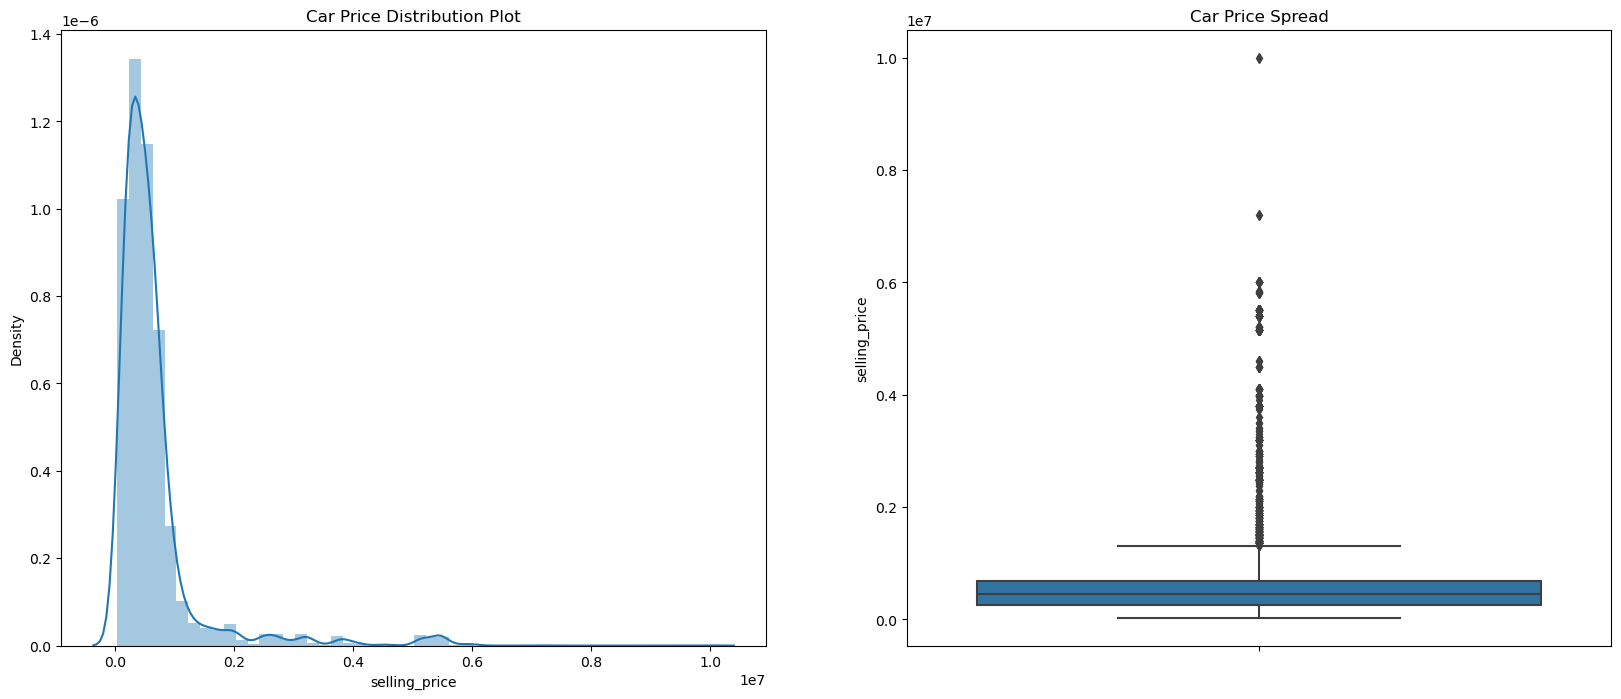

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df['selling_price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df['selling_price'])

plt.show()

## 2.3 Feature Year

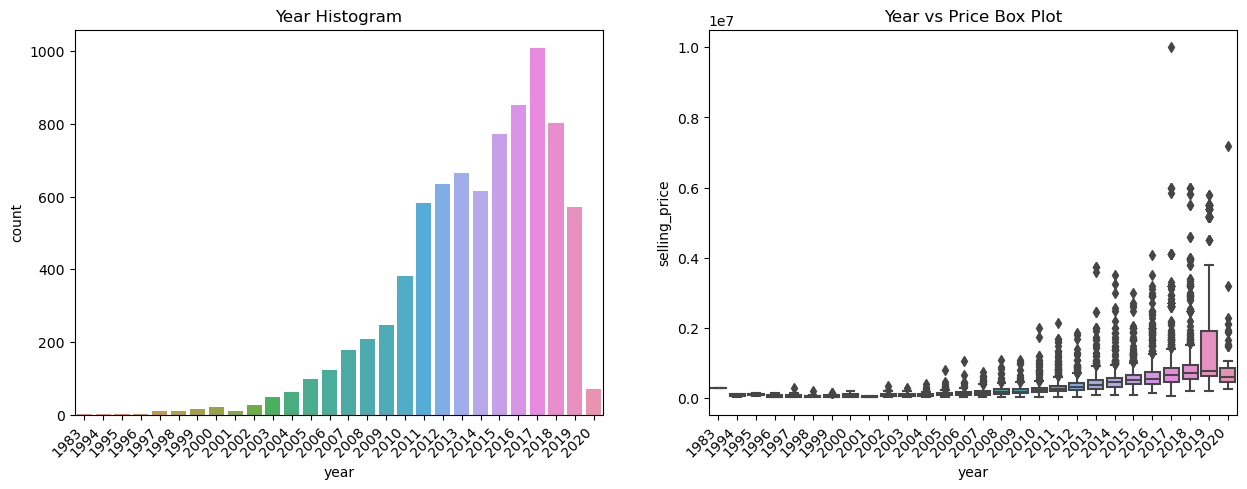

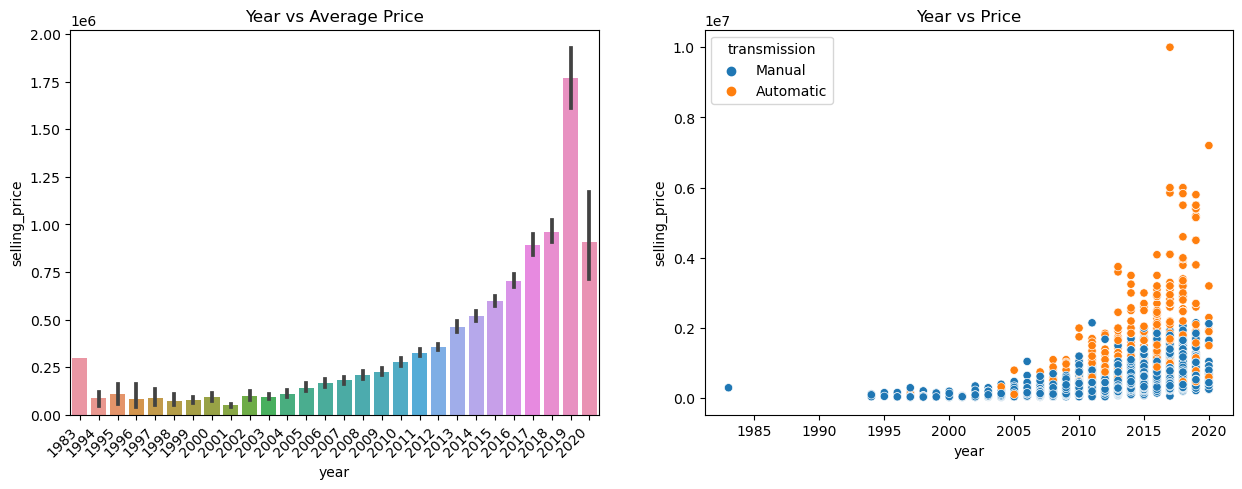

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Year Histogram')
count_plot= sns.countplot(data = df, x = 'year')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Year vs Price Box Plot')
barplot = sns.boxplot(x = df['year'], y = df['selling_price'])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Year vs Average Price')
barplot = sns.barplot(x = df['year'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Year vs Price')
scatterplot = sns.scatterplot(x = df['year'], y = df['selling_price'], hue = df['transmission'])

## 2.4 Feature Brand

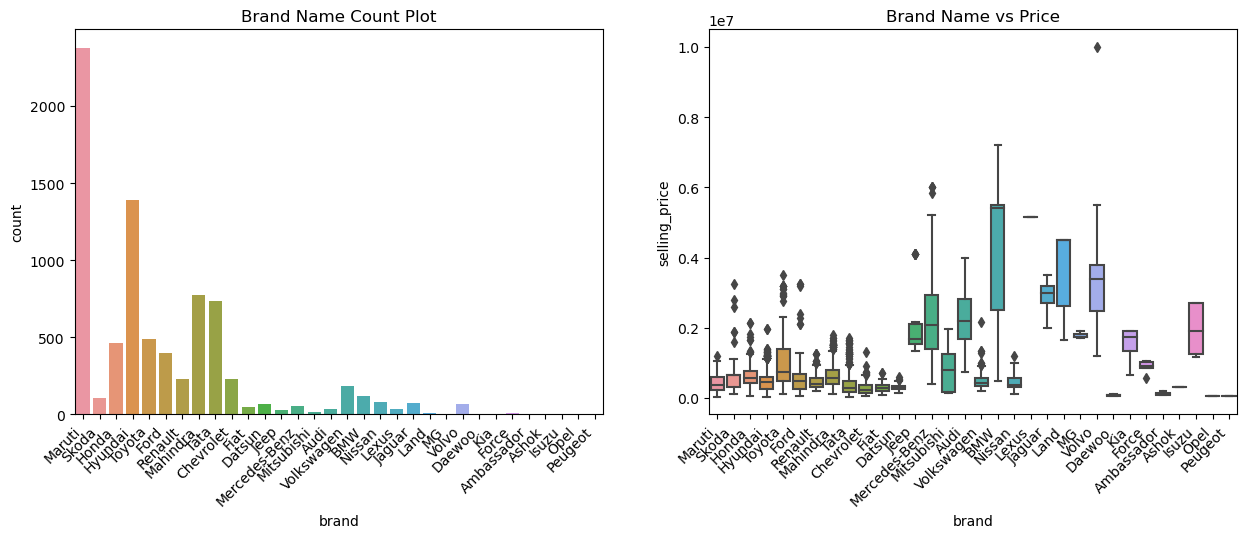

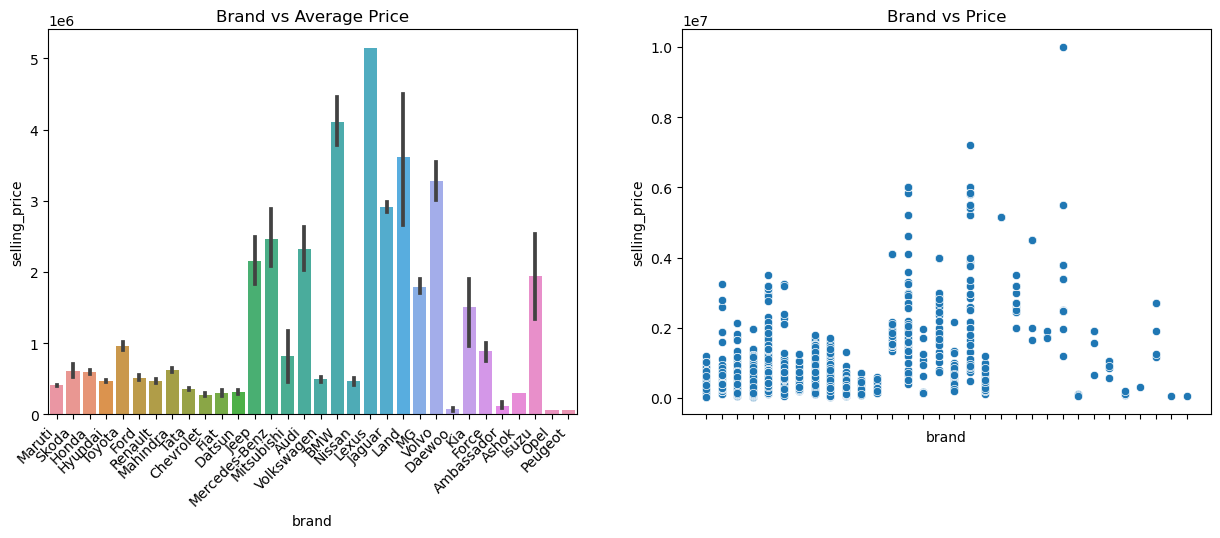

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Brand Name Count Plot')
count_plot= sns.countplot(data = df, x = 'brand')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Brand Name vs Price')
barplot = sns.boxplot(x = df['brand'], y = df['selling_price'])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Brand vs Average Price')
barplot = sns.barplot(x = df['brand'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Brand vs Price')
scatterplot = sns.scatterplot(x = df['brand'], y = df['selling_price'])
scatterplot.set_xticklabels(scatterplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

## 2.5 Feature KM Driven

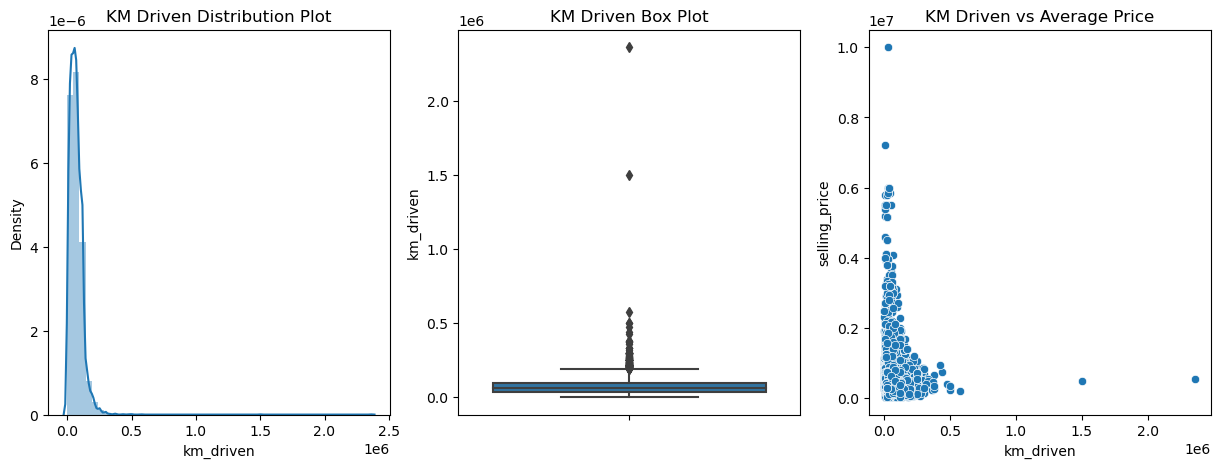

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('KM Driven Distribution Plot')
sns.distplot(df.km_driven)

plt.subplot(1,3,2)
plt.title('KM Driven Box Plot')
sns.boxplot(y=df.km_driven)

plt.subplot(1,3,3)
plt.title('KM Driven vs Average Price')
scatterplot = sns.scatterplot(x = df['km_driven'], y = df['selling_price'])

plt.show()


## 2.6 Feature Fuel

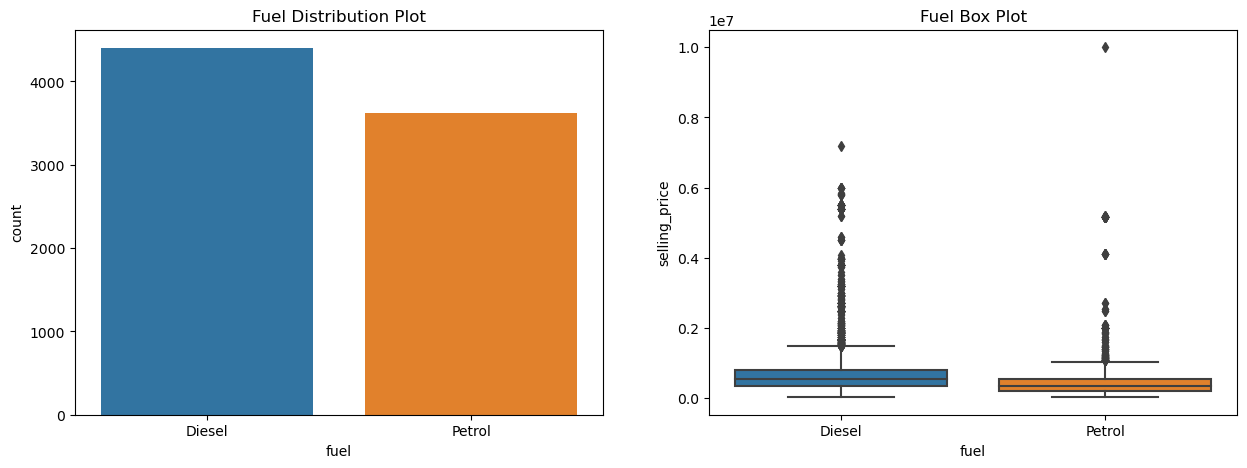

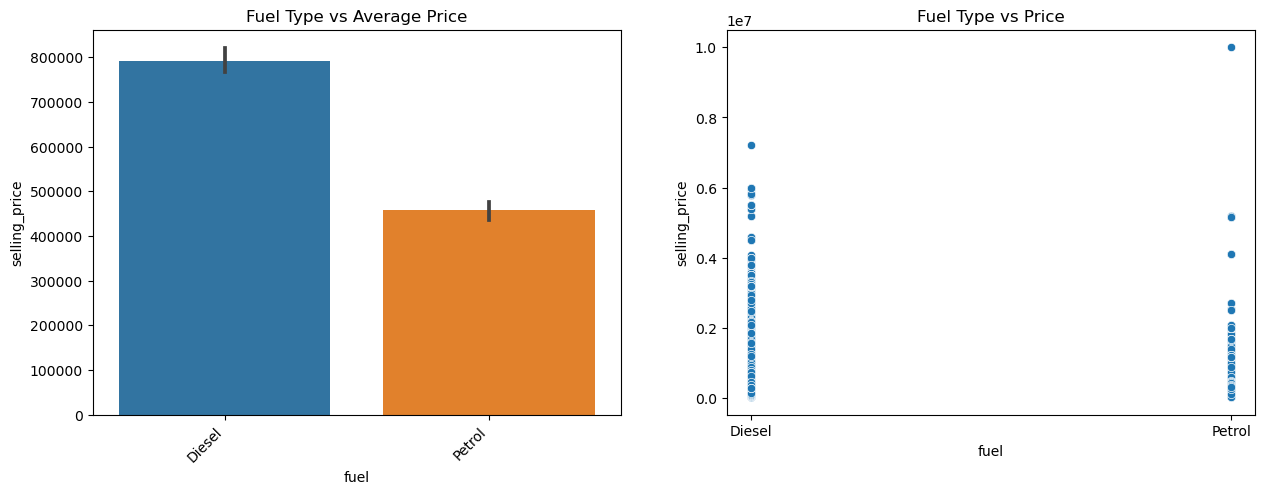

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Fuel Distribution Plot')
count_plot= sns.countplot(data = df, x = 'fuel')

plt.subplot(1,2,2)
plt.title('Fuel Box Plot')
sns.boxplot(x = df['fuel'], y = df['selling_price'])

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Fuel Type vs Average Price')
barplot = sns.barplot(x = df['fuel'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
scatterplot = sns.scatterplot(x = df['fuel'], y = df['selling_price'])

## 2.7 Feature Seller Type

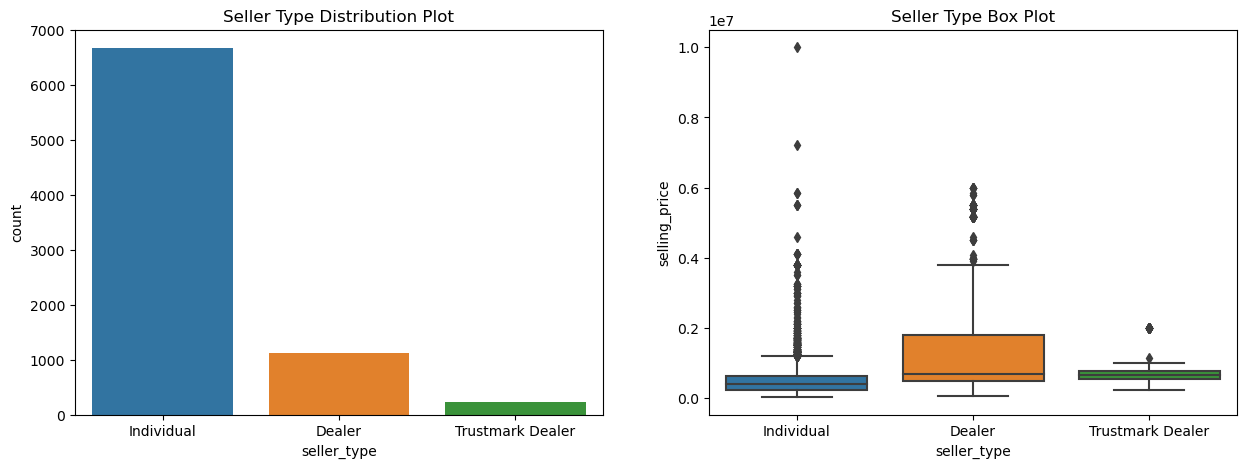

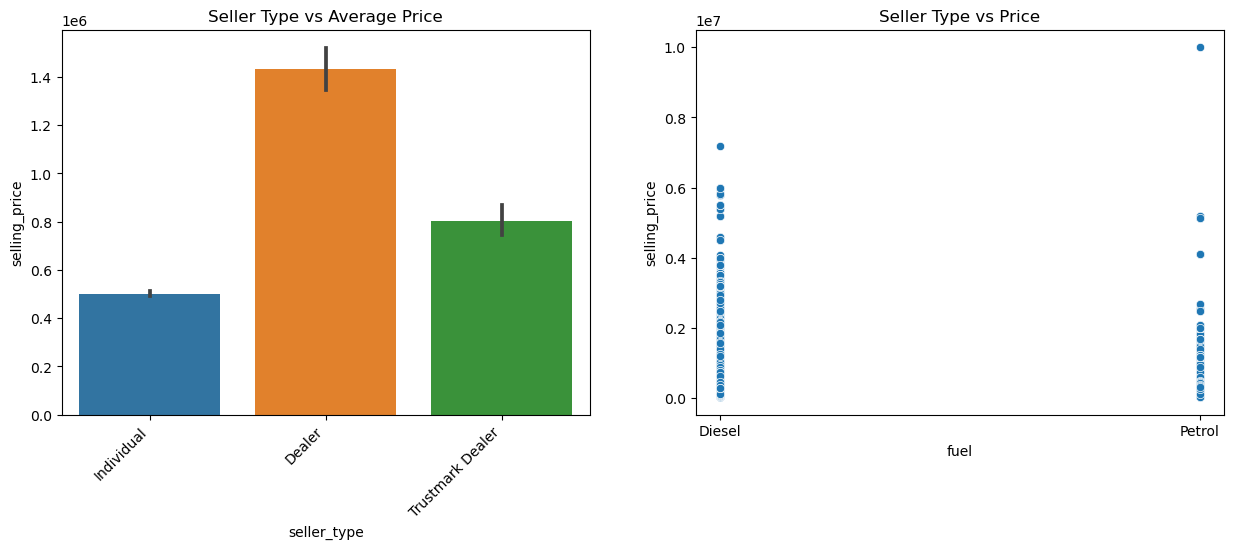

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Seller Type Distribution Plot')
count_plot= sns.countplot(data = df, x = 'seller_type')

plt.subplot(1,2,2)
plt.title('Seller Type Box Plot')
sns.boxplot(x = df['seller_type'], y = df['selling_price'])

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Seller Type vs Average Price')
barplot = sns.barplot(x = df['seller_type'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Seller Type vs Price')
scatterplot = sns.scatterplot(x = df['fuel'], y = df['selling_price'])

## 2.8 Feature Transmission

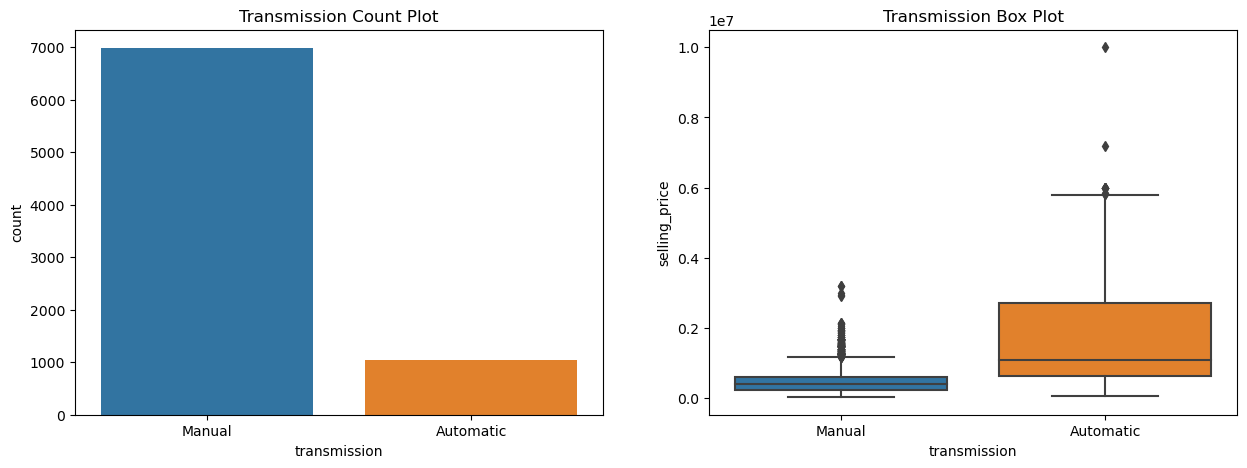

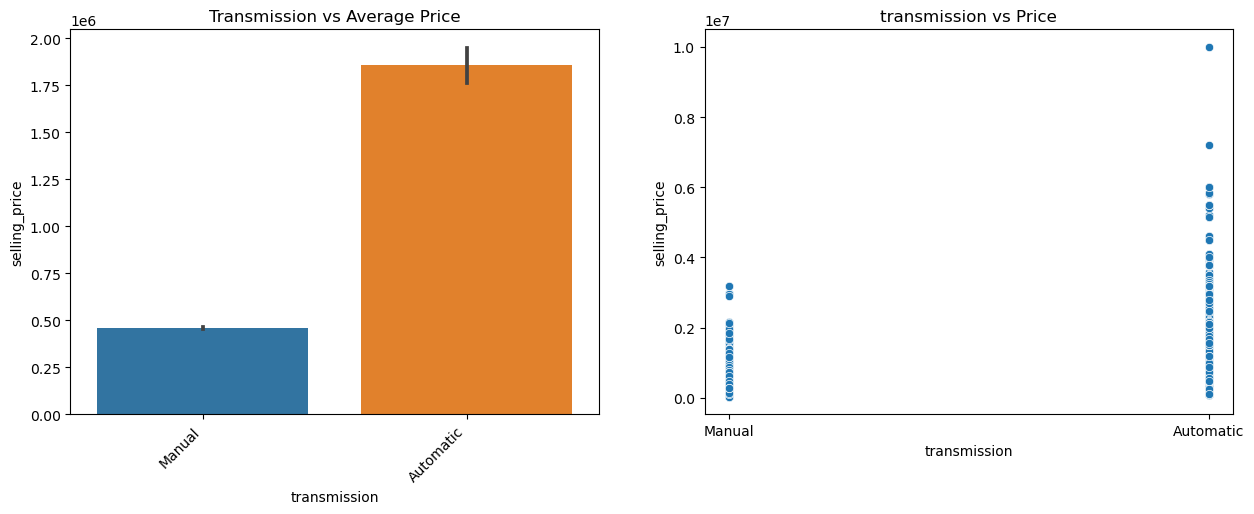

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Transmission Count Plot')
count_plot= sns.countplot(data = df, x = 'transmission')

plt.subplot(1,2,2)
plt.title('Transmission Box Plot')
sns.boxplot(x = df['transmission'], y = df['selling_price'])

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('Transmission vs Average Price')
barplot = sns.barplot(x = df['transmission'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('transmission vs Price')
scatterplot = sns.scatterplot(x = df['transmission'], y = df['selling_price'])

## 2.9 Feature Owner

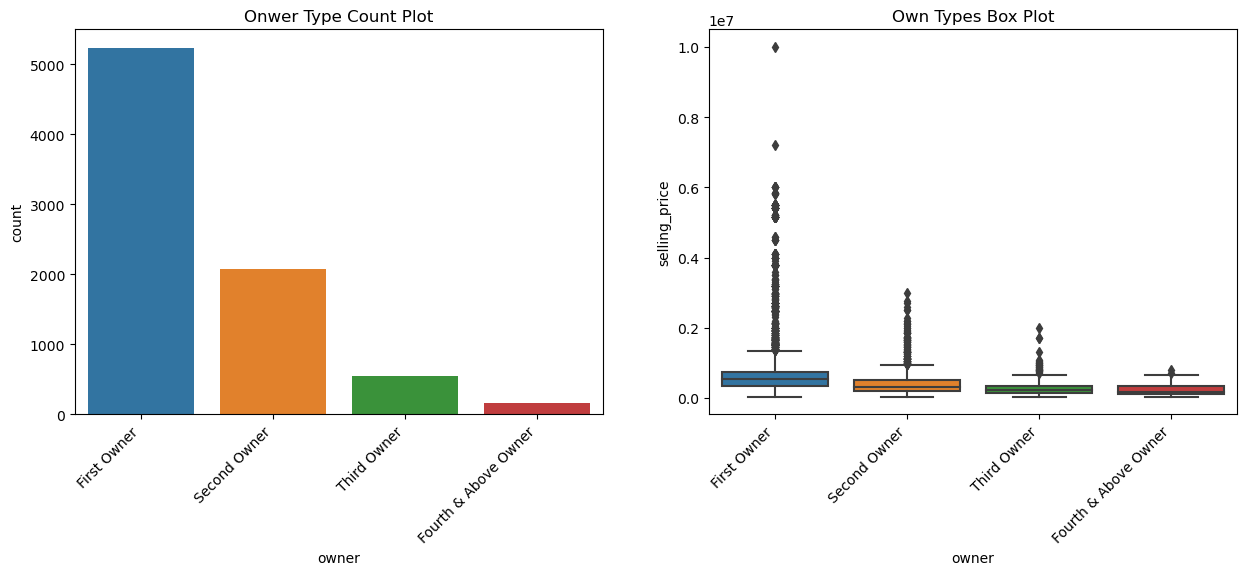

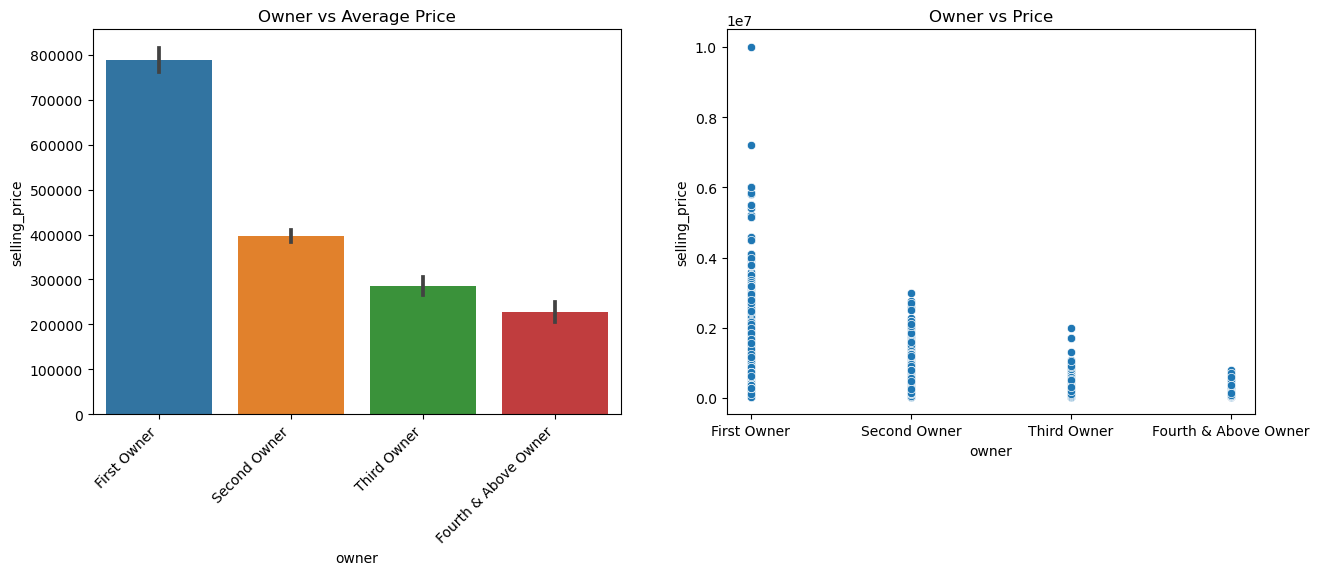

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Onwer Type Count Plot')
count_plot= sns.countplot(data = df, x = 'owner')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Own Types Box Plot')
boxplot = sns.boxplot(x = df['owner'], y = df['selling_price'])
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('Owner vs Average Price')
barplot = sns.barplot(x = df['owner'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Owner vs Price')
scatterplot = sns.scatterplot(x = df['owner'], y = df['selling_price'])

## 2.10 Feature Mileage

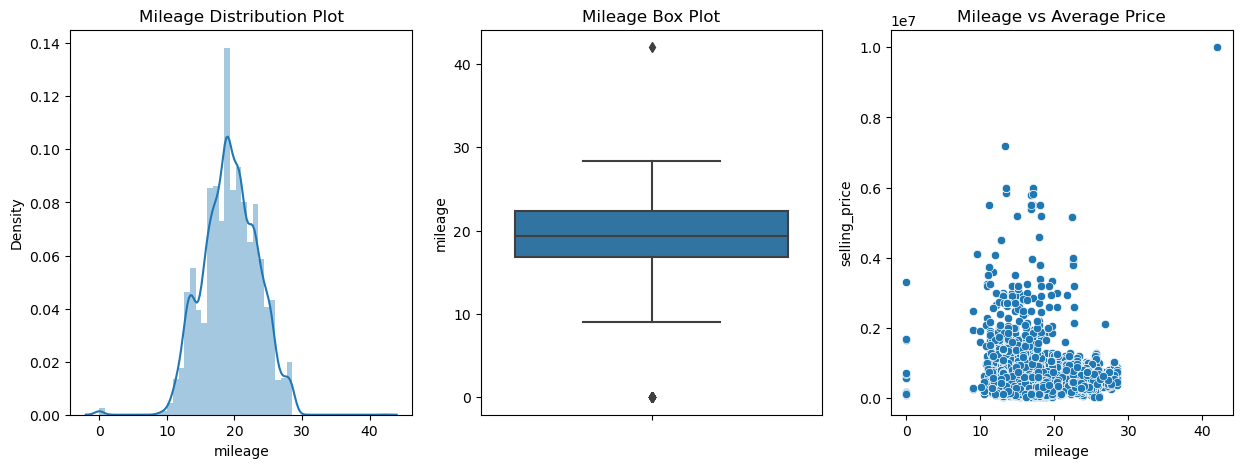

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Mileage Distribution Plot')
sns.distplot(df['mileage'])

plt.subplot(1,3,2)
plt.title('Mileage Box Plot')
sns.boxplot(y=df['mileage'])

plt.subplot(1,3,3)
plt.title('Mileage vs Average Price')
scatterplot = sns.scatterplot(x = df['mileage'], y = df['selling_price'])

plt.show()

## 2.11 Feature Engine

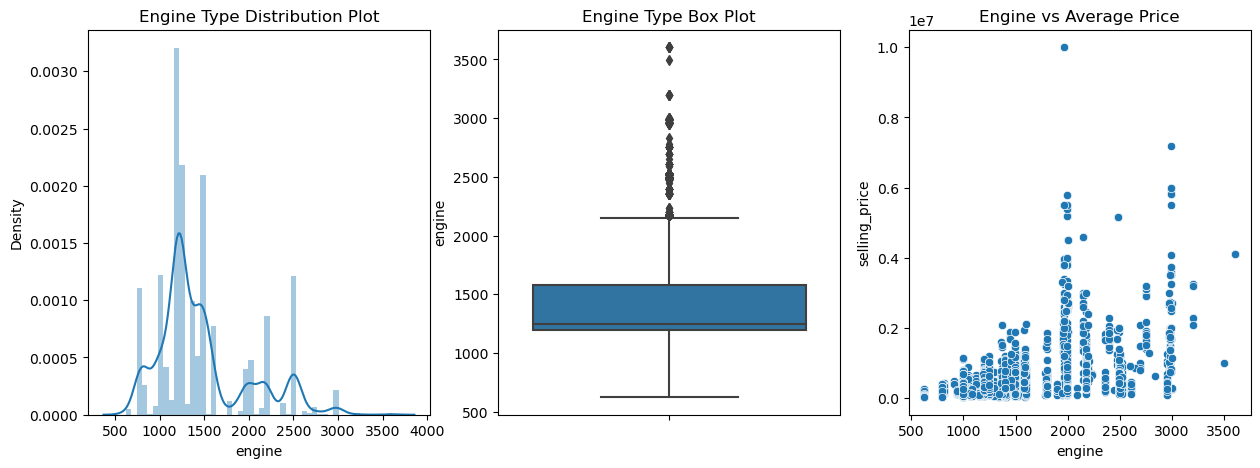

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Engine Type Distribution Plot')
sns.distplot(df['engine'])

plt.subplot(1,3,2)
plt.title('Engine Type Box Plot')
sns.boxplot(y=df['engine'])

plt.subplot(1,3,3)
plt.title('Engine vs Average Price')
scatterplot = sns.scatterplot(x = df['engine'], y = df['selling_price'])

plt.show()

## 2.12 Feature Max Power

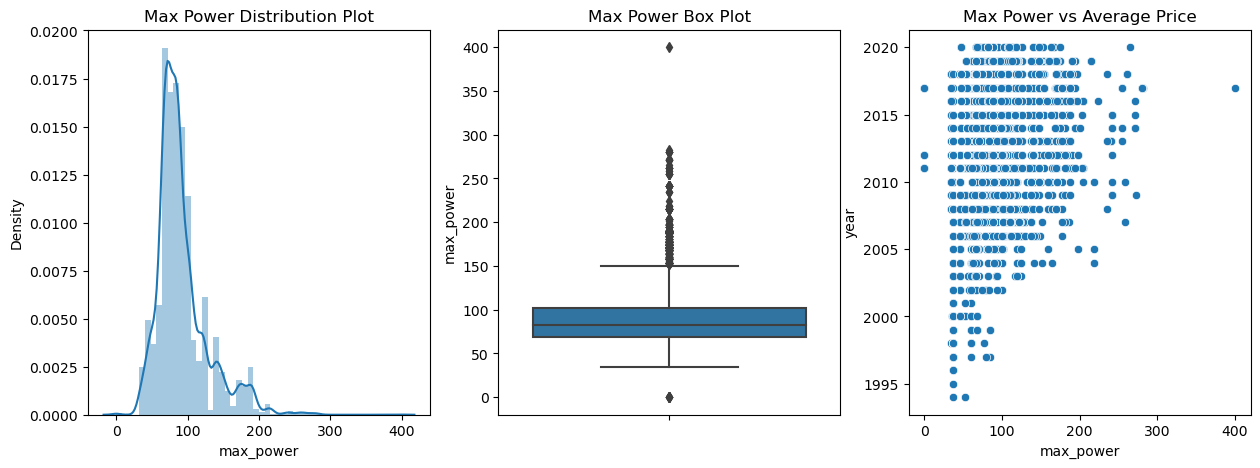

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Max Power Distribution Plot')
sns.distplot(df['max_power'])

plt.subplot(1,3,2)
plt.title('Max Power Box Plot')
sns.boxplot(y=df['max_power'])

plt.subplot(1,3,3)
plt.title('Max Power vs Average Price')
scatterplot = sns.scatterplot(x = df['max_power'], y = df['year'])

plt.show()

## 2.13 Feature Seat

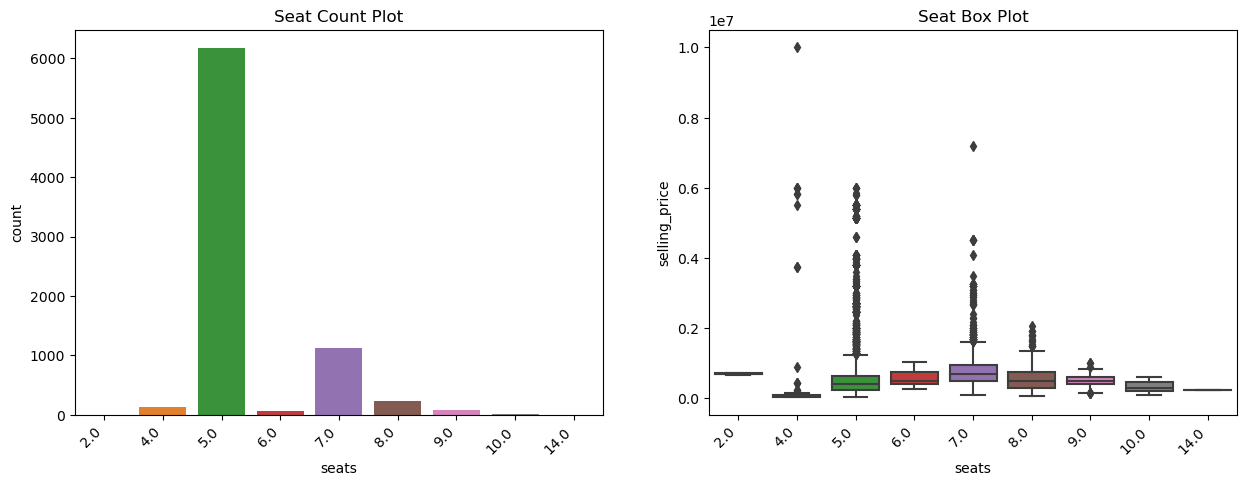

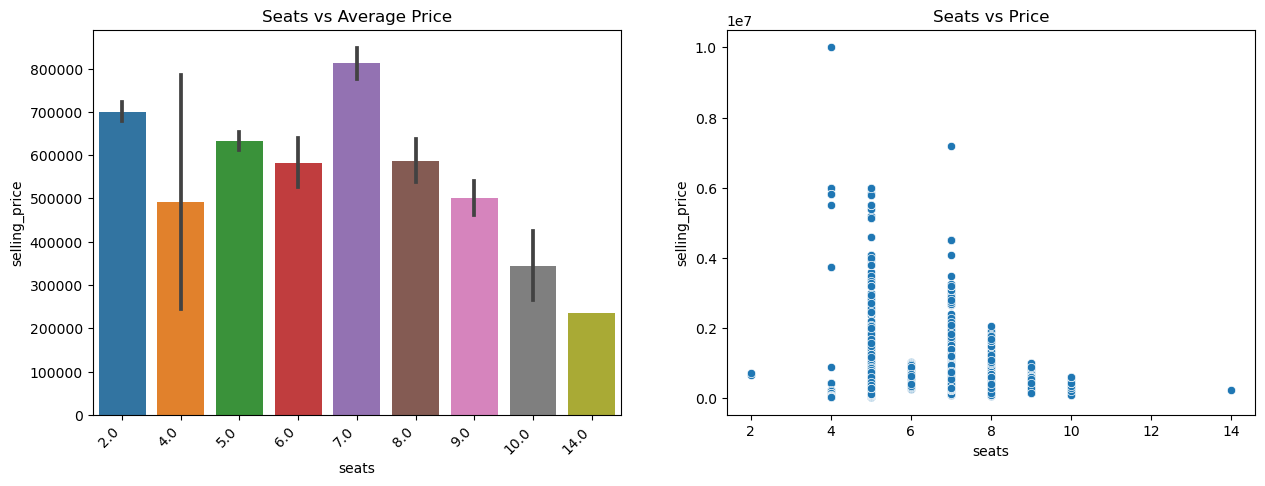

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Seat Count Plot')
count_plot= sns.countplot(data = df, x = 'seats')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Seat Box Plot')
boxplot = sns.boxplot(x = df['seats'], y = df['selling_price'])
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('Seats vs Average Price')
barplot = sns.barplot(x = df['seats'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Seats vs Price')
scatterplot = sns.scatterplot(x = df['seats'], y = df['selling_price'])

## 2.14 Label Encoding

### In this section, I will encode all categorical data.
- brand
- fuel
- seller_type
- transmission
- owner

In [28]:
from sklearn.preprocessing import LabelEncoder

# brand_le = LabelEncoder()
# df["brand"] = brand_le.fit_transform(df["brand"])

In [29]:
df[["brand"]].shape

(8028, 1)

In [30]:
df.reset_index(inplace=True)

In [31]:
from sklearn.preprocessing import OneHotEncoder

# Create function for one-hot encoding a feature in dataframe 
def one_hot_transform(encoder, dataframe, feature):

    encoded = encoder.transform(dataframe[[feature]])

    # Transform encoded data arrays into dataframe where columns are based values
    categories = encoder.categories_[0]
    feature_df = pd.DataFrame(encoded.toarray(), columns=categories[1:])
    concat_dataframe = pd.concat([dataframe, feature_df], axis=1)
    
    return concat_dataframe.drop(feature, axis=1)

In [32]:
# Since 'brand' and 'seller_type' have than two unique values, we should apply one-hot encoding
brand_ohe = OneHotEncoder(drop='first').fit(df[['brand']])
original_df = df.copy()
df = one_hot_transform(brand_ohe, df, 'brand')

In [33]:
df

,index,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8024,8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8025,8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8026,8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
# Excluding one-hot encoded features
selected_cols = ['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
dfcopy = df.copy()
dfcopy = df[selected_cols]

In [35]:
df

,index,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8024,8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8025,8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8026,8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

In [37]:
le = LabelEncoder()
df["seller_type"] = le.fit_transform(df["seller_type"])

In [38]:
le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])

In [39]:
owner_le = LabelEncoder()
df["owner"] = owner_le.fit_transform(df["owner"])

In [40]:
owner_le.classes_

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Third Owner'], dtype=object)

In [41]:
# check the encoded data.
df.head(5)

,index,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,2014,450000,145500,0,1,1,0,23.40,1248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2014,370000,120000,0,1,1,2,21.14,1498.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,2006,158000,140000,1,1,1,3,17.70,1497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2010,225000,127000,0,1,1,0,23.00,1396.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2007,130000,120000,1,1,1,0,16.10,1298.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df.shape

(8028, 43)

## 2.15 Correlation Graph

- In this section, I will use heatmap to check the correlation between features to avoid using the features with strong correlations.

<AxesSubplot:>

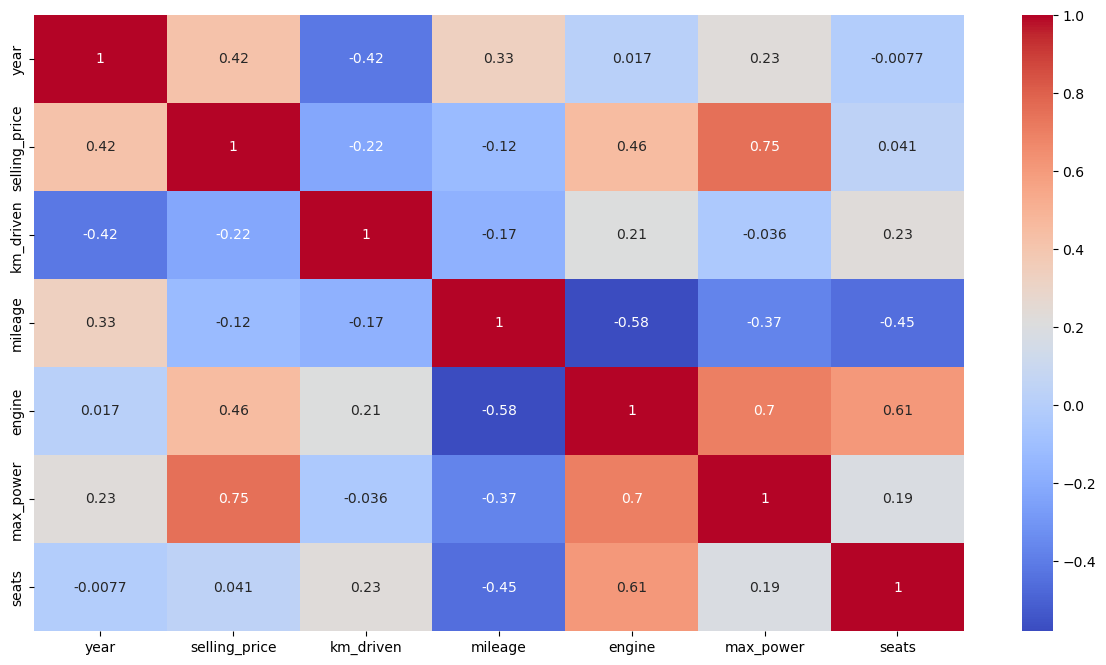

In [43]:
plt.figure(figsize = (15,8))
sns.heatmap(dfcopy.corr(), annot=True, cmap="coolwarm")

### Correlation Analysis
- Engine and max power have strong correlation.
- Engine and seat also have strong correlation.
- Therefore, we should drop the Engine Column.

## Check Predictive Power Score
- I use PPS scores to select some features to train the model.

<AxesSubplot:xlabel='x', ylabel='y'>

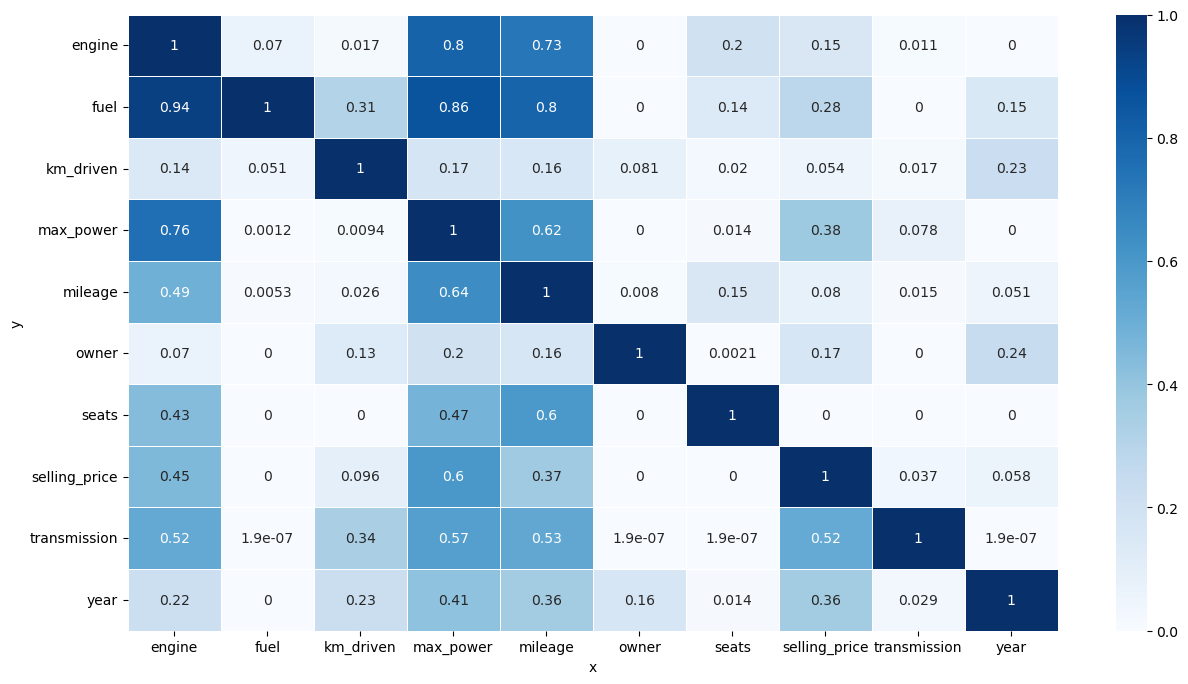

In [44]:
import ppscore as pps

# before using pps, let's drop country and year
temp_df = df.copy()
temp_df.drop(['engine'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

# 4. Feature Selection

Top Features according to PPS
- max_power
- mileage
- brand

Features from EDA
- year

In [45]:
# brands df.columns[-31:]

In [46]:
brand_cats = list(brand_ohe.categories_[0][1:])

selected_features = ['max_power', 'mileage', 'year'] + brand_cats
#x is our strong features
X = df[ selected_features ]

#y is simply the life expectancy col
y = df['selling_price']

### Split the dataset into training and testing sets.

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

m = X.shape[0]  #number of samples
n = X.shape[1]  #number of features

# 5. Preprocessing

## 5.1 Null Values

In [48]:
#check for null values of training dataset.
X_train[selected_features].isna().sum()

max_power        149
mileage          154
year               0
Ashok              0
Audi               0
BMW                0
Chevrolet          0
Daewoo             0
Datsun             0
Fiat               0
Force              0
Ford               0
Honda              0
Hyundai            0
Isuzu              0
Jaguar             0
Jeep               0
Kia                0
Land               0
Lexus              0
MG                 0
Mahindra           0
Maruti             0
Mercedes-Benz      0
Mitsubishi         0
Nissan             0
Opel               0
Peugeot            0
Renault            0
Skoda              0
Tata               0
Toyota             0
Volkswagen         0
Volvo              0
dtype: int64

In [49]:
#check for null values of training dataset.
X_test[selected_features].isna().sum()

max_power        59
mileage          60
year              0
Ashok             0
Audi              0
BMW               0
Chevrolet         0
Daewoo            0
Datsun            0
Fiat              0
Force             0
Ford              0
Honda             0
Hyundai           0
Isuzu             0
Jaguar            0
Jeep              0
Kia               0
Land              0
Lexus             0
MG                0
Mahindra          0
Maruti            0
Mercedes-Benz     0
Mitsubishi        0
Nissan            0
Opel              0
Peugeot           0
Renault           0
Skoda             0
Tata              0
Toyota            0
Volkswagen        0
Volvo             0
dtype: int64

In [50]:
y_train.isna().sum()

0

In [51]:
y_test.isna().sum()

0

<AxesSubplot:title={'center':'Mileage Distribution Plot'}, xlabel='mileage', ylabel='Density'>

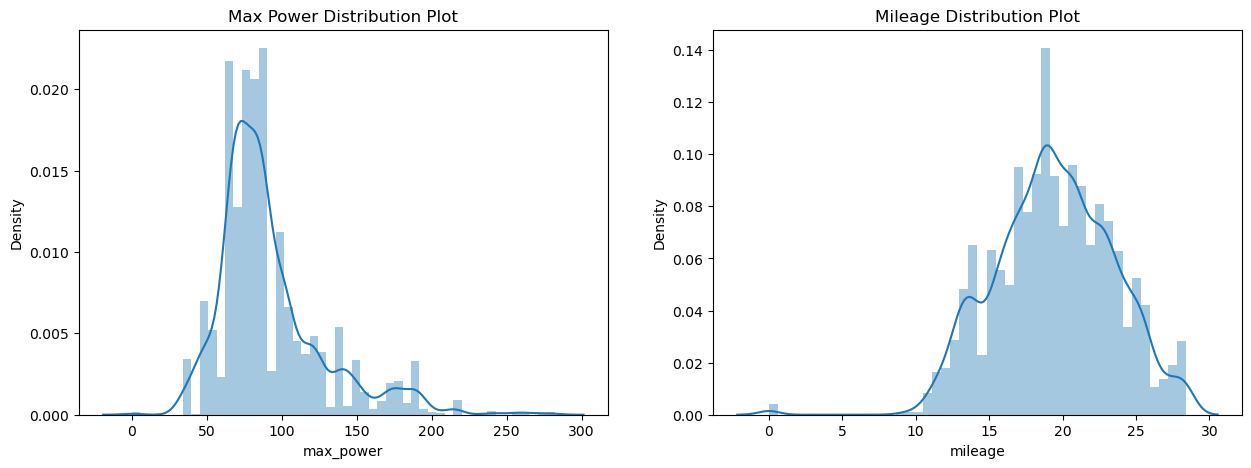

In [52]:
# Check the distribution of max_power and mileage to replace missing values.
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Max Power Distribution Plot')
sns.distplot(X_train['max_power'])

plt.subplot(1,2,2)
plt.title('Mileage Distribution Plot')
sns.distplot(X_train['mileage'])

In [53]:
X_train[['max_power', 'mileage']].describe()

,max_power,mileage
count,5470.000000,5465.000000
mean,92.049350,19.416893
std,35.866965,4.018603
min,0.000000,0.000000
25%,68.070000,16.800000
50%,82.400000,19.330000
75%,103.200000,22.320000
max,282.000000,28.400000


## 5.2 Replacing missing data
- Since Both features is roughly follow normal distribution, so I will use mean value to replace missing values of both features.
- There is no missing data in brand and year features.

In [54]:
# Before replacing missing value. 
# I will save mean and mode data as default values for deployment 
# in case users doesn't have values for all features.

default_values = {
    'max_power': X_train['max_power'].mean(),
    'mileage': X_train['mileage'].mean(),
    'year': X_train['year'].mode()[0],
#     'brand': X_train['brand'].mode()[0]
}

In [55]:
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [56]:
X_test['max_power'].fillna(X_train['max_power'].mean(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [57]:
# check for null values of training dataset again.
X_train[selected_features].isna().sum()

max_power        0
mileage          0
year             0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64

In [58]:
#check for null values of training dataset again.
X_test[selected_features].isna().sum()

max_power        0
mileage          0
year             0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64

## 5.3 Checking Outliers

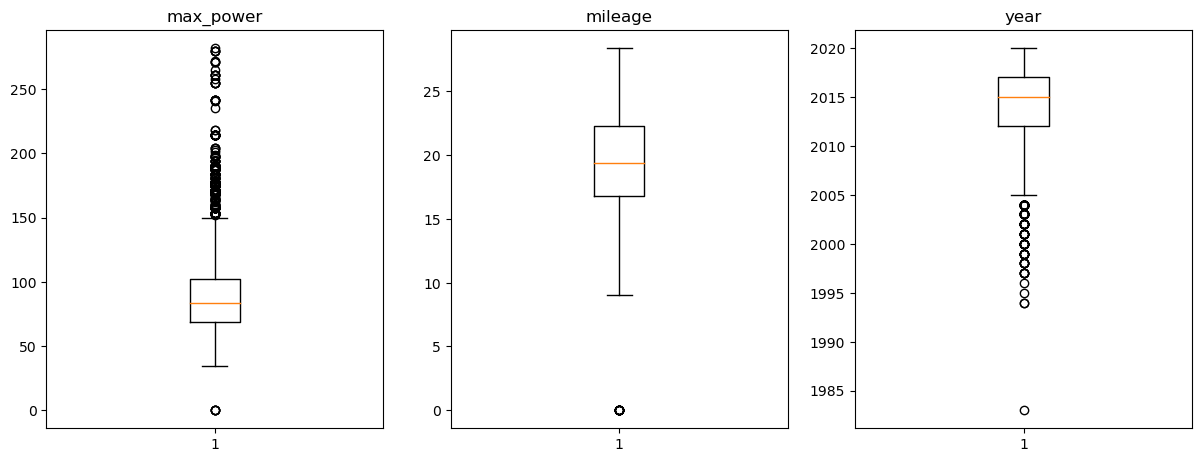

In [59]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'mileage':2,'year':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
    plt.subplot(5,4,i)
    plt.boxplot(X_train[variable])
    plt.title(variable)

plt.show()

In [60]:
# X_train = X_train[['max_power', 'mileage', 'brand']]
# X_test = X_test[['max_power', 'mileage', 'brand']]

In [61]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [62]:
for col in X_train.columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%

---------------year---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%

---------------Ashok---------------

Number of outliers: 1
Percent of data that is outlier: 0.02%

---------------Audi---------------

Number of outliers: 24
Percent of data that is outlier: 0.43%

---------------BMW---------------

Number of outliers: 83
Percent of data that is outlier: 1.48%

---------------Chevrolet---------------

Number of outliers: 152
Percent of data that is outlier: 2.71%

---------------Daewoo---------------

Number of outliers: 3
Percent of data that is outlier: 0.05%

---------------Datsun---------------

Number of outliers: 46
Percent of data that is outlier: 0.82%

---------------Fiat---------------

Number of outliers: 35
Percent of data that is outlier

### Outlier Analysis
Even though there are a lot of outliers, I will not remove them since there is not enough time to inspect each outlier and I don't want to bindly remove all outliers.

## 5.4 Scaling
In this section
- I will use standardization to convert numerical values into similar range to make the training more efficient.

In [63]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
num_features = ['max_power', 'mileage', 'year'];
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features]  = scaler.transform(X_test[num_features])

# also need to scale y here.

In [64]:
X_train.shape

(5619, 34)

#### 'selling_price' is a big number. Therefore, I will scale them using np.log function.

In [65]:
# Also scale the label
y_train = np.log(y_train)
y_test = np.log(y_test)
y_train

6765    12.980800
1485    12.899220
7805    13.122363
1272    12.154779
1411    12.278393
          ...    
5226    12.611538
5390    12.847927
860     13.527828
7603    15.454507
7270    13.560618
Name: selling_price, Length: 5619, dtype: float64

In [66]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 34)
Shape of X_test:  (2409, 34)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [67]:
X.shape

(8028, 34)

In [68]:
# actually you can do like this too
# X = np.insert(X, 0, 1, axis=1)
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [69]:
y_train.values

array([12.98079981, 12.89921983, 13.12236338, ..., 13.52782849,
       15.45450727, 13.56061831])

# 6. Modeling

In [70]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "myo"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="mth-mlassignment2")

2023/09/14 22:23:49 INFO mlflow.tracking.fluent: Experiment with name 'mth-mlassignment2' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/949034139930158777', creation_time=1694705029684, experiment_id='949034139930158777', last_update_time=1694705029684, lifecycle_stage='active', name='mth-mlassignment2', tags={}>

In [71]:
class PolynomialFeatures:
    def __init__(self, degree):
        self.degree = degree
    
    def fit_transform(self, X):
        # Transform input features to include polynomial terms
        X_poly = np.column_stack([X ** self.degree])
        return X_poly

In [72]:
from sklearn.model_selection import KFold
from math import sqrt, isnan

class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, lr, method, momentum, init_theta, mlflow_params, num_epochs=300, batch_size=50, cv=kfold):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.regularization = regularization
        self.momentum = momentum
        self.init_theta = init_theta
        self.mlflow_params = mlflow_params

    def mse(self, ytrue, ypred):
        mse = ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
        
        return mse
    
    def r2(self, ytrue, ypred):
        return 1 - ((((ytrue - ypred) ** 2).sum()) / (((ytrue - ytrue.mean()) ** 2).sum()))
    
    def avgMse(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)
    
    def avgR2(self):
        return np.sum(np.array(self.kfold_r2)) / len(self.kfold_r2)
    
    def fit(self, X_train, y_train):
        #create a list of kfold scores
        self.kfold_scores = list()
        self.kfold_r2 = list()
        
        
        #reset val loss
        self.val_loss_old = np.infty
        

        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            # compute inital theta
            
            if self.init_theta == 'zero':
                self.theta = np.zeros(X_cross_train.shape[1])
            else:
                m = X_cross_train.shape[1]
                sqrt_m = sqrt(m)
                lower, upper = -(1 / sqrt_m), (1 / sqrt_m)
                numbers = np.random.uniform(lower, upper, size=X_cross_train.shape[1])
                scaled = lower + numbers * (upper - lower)
                self.theta = scaled
                        
            
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
#                 params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
#                 mlflow.log_params(params=self.mlflow_params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                    
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx].reshape(1, )
                            
                            train_loss = self._train(X_method_train, y_method_train)
                        
#                             if isnan(self.theta[0]):
                            
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)
                    

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)
                    
                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    val_r2 = self.r2(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_r2", value=val_r2, step=epoch)
                    
                    #record dataset
#                     mlflow_train_data = mlflow.data.from_numpy(features=X_method_train, targets=y_method_train)
#                     mlflow.log_input(mlflow_train_data, context="training")
                    
#                     mlflow_val_data = mlflow.data.from_numpy(features=X_cross_val, targets=y_cross_val)
#                     mlflow.log_input(mlflow_val_data, context="validation")
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                self.kfold_r2.append(val_r2)
                print(f"Fold {fold} MSE: {val_loss_new}")
                print(f"Fold {fold} R2: {val_r2}")
            
                    
    def _train(self, X, y):
        
        yhat = self.predict(X)
            
        m    = X.shape[0]
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        prev_step = 0
        
        step = self.lr * grad
        step += self.momentum * prev_step
            
        self.theta -= step
        prev_step = step
        
        return self.mse(y, yhat)
        
    
    def predict(self, X):
        prediction = X @ self.theta
            
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]
    
    def feature_importance(self):
        feature_importances = model._coef()
        sorted_idx = feature_importances.argsort()
        plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
        plt.xlabel("Feature Importance")


In [73]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class NoRegularization:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, theta): # return 0, since we won't have any regularization.
        return 0
    
class Lasso(LinearRegression):
    
    def __init__(self, method, lr, l, momentum, init_theta, mlflow_params):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method, momentum, init_theta, mlflow_params)
        
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, l, momentum, init_theta, mlflow_params):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, momentum, init_theta, mlflow_params)
        
class Normal(LinearRegression):
    
    def __init__(self, method, lr, init_theta, momentum, l, mlflow_params):
        self.regularization = NoRegularization(l)
        super().__init__(self.regularization, lr, method, momentum, init_theta, mlflow_params)

## 6.1 Experiment

In [74]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [75]:
import math

polynomial_degrees = [True, False]
regs = ["Normal", "Ridge", "Lasso"]
momentums = [0, 0.4]
grads = ['sto', 'mini', 'batch']
init_thetas = ['zero', 'xavier']
lrs = [0.01, 0.001, 0.0001]

# init_theta = init_thetas[0]
# momentum = momentums[1]

# polynomial_degree = 2

for polynomial_degree in polynomial_degrees:
    for reg in regs:
        for momentum in momentums:
            for grad in grads:
                for init_theta in init_thetas:
                    for lr in lrs:
                        
                        mlflow_params = {"polynomial": polynomial_degree,
                                         "reg": reg, 
                                         "momentum": momentum, 
                                         "method": grad,
                                         "init_theta": init_theta,
                                         "lr": lr}
                        params = {"method": grad, "lr": lr, "l": lr, "momentum": momentum, "init_theta": init_theta, "mlflow_params": mlflow_params}
                        
                        current_run = f"polynomial-{polynomial_degree}-reg-{reg}-momemtum{momentum}-method-{grad}-theta-{init_theta}-lr-{lr}"
                        mlflow.start_run(run_name=current_run, nested=True)
                        mlflow.log_params(params=mlflow_params)

                        print("="*5, current_run, "="*5)

                        ########
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                        model = type_of_regression(**params)
                        
                        if polynomial_degree:
                            poly_X_train = PolynomialFeatures(degree = 3).fit_transform(X_train)
                            model.fit(poly_X_train, y_train.values)
                        else:
                            model.fit(X_train, y_train.values)
                        
                        train_mse  = model.avgMse()
                        train_r2 = model.avgR2()

                        print("Average MSE: ", train_mse)
                        mlflow.log_metric(key="training_mse", value=train_mse)

                        print("Average R2: ", train_r2)
                        mlflow.log_metric(key="training_r2", value=train_r2)
                        
                        if polynomial_degree:
                            poly_X_test = PolynomialFeatures(degree = 2).fit_transform(X_test)
                            signature = mlflow.models.infer_signature(poly_X_train, model.predict(poly_X_train))
                        else:
                            signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                            
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                        # #######
                        mlflow.end_run()

===== polynomial-True-reg-Normal-momemtum0-method-sto-theta-zero-lr-0.01 =====
Fold 0 MSE: inf
Fold 0 R2: -inf
Fold 1 MSE: inf
Fold 1 R2: -inf
Fold 2 MSE: inf
Fold 2 R2: -inf
Average MSE:  inf
Average R2:  -inf
===== polynomial-True-reg-Normal-momemtum0-method-sto-theta-zero-lr-0.001 =====
Fold 0 MSE: inf
Fold 0 R2: -inf
Fold 1 MSE: inf
Fold 1 R2: -inf
Fold 2 MSE: inf
Fold 2 R2: -inf
Average MSE:  inf
Average R2:  -inf
===== polynomial-True-reg-Normal-momemtum0-method-sto-theta-zero-lr-0.0001 =====
Fold 0 MSE: 0.5923442030936671
Fold 0 R2: 0.13725522742337048
Fold 1 MSE: 0.35661912684110564
Fold 1 R2: 0.5069376476375989
Fold 2 MSE: 0.3860739780804328
Fold 2 R2: 0.44403549276019205
Average MSE:  0.4450124360050685
Average R2:  0.3627427892737205
===== polynomial-True-reg-Normal-momemtum0-method-sto-theta-xavier-lr-0.01 =====
Fold 0 MSE: inf
Fold 0 R2: -inf
Fold 1 MSE: inf
Fold 1 R2: -inf
Fold 2 MSE: nan
Fold 2 R2: nan
Average MSE:  nan
Average R2:  nan
===== polynomial-True-reg-Normal-m

Fold 0 MSE: 0.7812317937213497
Fold 0 R2: -0.13785809447210595
Fold 1 MSE: 1.3226570665751287
Fold 1 R2: -0.8287084329743692
Fold 2 MSE: 0.7722681575980078
Fold 2 R2: -0.1121021101466757
Average MSE:  0.9587190059648288
Average R2:  -0.3595562125310503
===== polynomial-True-reg-Normal-momemtum0.4-method-mini-theta-xavier-lr-0.0001 =====
Fold 0 MSE: 2.860371896874001
Fold 0 R2: -3.1661096517271314
Fold 1 MSE: 2.836439303245577
Fold 1 R2: -2.921666926784231
Fold 2 MSE: 2.92942451802922
Fold 2 R2: -3.218507724245068
Average MSE:  2.8754119060495995
Average R2:  -3.102094767585477
===== polynomial-True-reg-Normal-momemtum0.4-method-batch-theta-zero-lr-0.01 =====
Fold 0 MSE: 1.817455288772103
Fold 0 R2: -1.6471096392783195
Fold 1 MSE: 1.6737942237668075
Fold 1 R2: -1.3141914026074475
Fold 2 MSE: 1.708234076504687
Fold 2 R2: -1.45993661970224
Average MSE:  1.733161196347866
Average R2:  -1.4737458871960023
===== polynomial-True-reg-Normal-momemtum0.4-method-batch-theta-zero-lr-0.001 =====
Fo

Fold 0 MSE: inf
Fold 0 R2: -inf
Fold 1 MSE: inf
Fold 1 R2: -inf
Fold 2 MSE: inf
Fold 2 R2: -inf
Average MSE:  inf
Average R2:  -inf
===== polynomial-True-reg-Ridge-momemtum0.4-method-sto-theta-zero-lr-0.0001 =====
Fold 0 MSE: 0.5126850736514951
Fold 0 R2: 0.25327813632549645
Fold 1 MSE: 0.3943160122902164
Fold 1 R2: 0.45481785479049197
Fold 2 MSE: 0.36305474055952175
Fold 2 R2: 0.4771842667567735
Average MSE:  0.4233519421670777
Average R2:  0.3950934192909206
===== polynomial-True-reg-Ridge-momemtum0.4-method-sto-theta-xavier-lr-0.01 =====
Fold 0 MSE: inf
Fold 0 R2: -inf
Fold 1 MSE: inf
Fold 1 R2: -inf
Fold 2 MSE: inf
Fold 2 R2: -inf
Average MSE:  inf
Average R2:  -inf
===== polynomial-True-reg-Ridge-momemtum0.4-method-sto-theta-xavier-lr-0.001 =====
Fold 0 MSE: inf
Fold 0 R2: -inf
Fold 1 MSE: inf
Fold 1 R2: -inf
Fold 2 MSE: inf
Fold 2 R2: -inf
Average MSE:  inf
Average R2:  -inf
===== polynomial-True-reg-Ridge-momemtum0.4-method-sto-theta-xavier-lr-0.0001 =====
Fold 0 MSE: 0.68741617

Fold 0 MSE: 2.889662830900633
Fold 0 R2: -3.2087716716867796
Fold 1 MSE: 2.8458083371069174
Fold 1 R2: -2.93462057264152
Fold 2 MSE: 2.9685715234098304
Fold 2 R2: -3.2748812350021463
Average MSE:  2.901347563805794
Average R2:  -3.1394244931101487
===== polynomial-True-reg-Lasso-momemtum0-method-batch-theta-zero-lr-0.01 =====
Fold 0 MSE: 1.8333661756282527
Fold 0 R2: -1.670283723519388
Fold 1 MSE: 1.6985441397244585
Fold 1 R2: -1.3484106882945226
Fold 2 MSE: 1.731947322767646
Fold 2 R2: -1.4940847986061692
Average MSE:  1.7546192127067857
Average R2:  -1.5042597368066932
===== polynomial-True-reg-Lasso-momemtum0-method-batch-theta-zero-lr-0.001 =====
Fold 0 MSE: 86.715319761962
Fold 0 R2: -125.30019579192782
Fold 1 MSE: 82.46854184075006
Fold 1 R2: -113.02117883041831
Fold 2 MSE: 84.40699369749281
Fold 2 R2: -120.55000161353415
Average MSE:  84.53028510006828
Average R2:  -119.62379207862676
===== polynomial-True-reg-Lasso-momemtum0-method-batch-theta-zero-lr-0.0001 =====
Fold 0 MSE: 1

===== polynomial-False-reg-Normal-momemtum0-method-sto-theta-zero-lr-0.0001 =====
Fold 0 MSE: 0.10400181166752351
Fold 0 R2: 0.848522161800465
Fold 1 MSE: 0.0978310505896378
Fold 1 R2: 0.8647385843684594
Fold 2 MSE: 0.09775114864041294
Fold 2 R2: 0.8592337938542178
Average MSE:  0.09986133696585808
Average R2:  0.8574981800077142
===== polynomial-False-reg-Normal-momemtum0-method-sto-theta-xavier-lr-0.01 =====
Fold 0 MSE: 0.08716164866883849
Fold 0 R2: 0.873049729590567
Fold 1 MSE: 0.08391864550480292
Fold 1 R2: 0.8839739048037643
Fold 2 MSE: 0.08402608773341502
Fold 2 R2: 0.8789985207128763
Average MSE:  0.08503546063568547
Average R2:  0.8786740517024025
===== polynomial-False-reg-Normal-momemtum0-method-sto-theta-xavier-lr-0.001 =====
Fold 0 MSE: 0.08756652472344162
Fold 0 R2: 0.8724600307333384
Fold 1 MSE: 0.08449562289070425
Fold 1 R2: 0.8831761746604813
Fold 2 MSE: 0.08636068268567595
Fold 2 R2: 0.8756365952635318
Average MSE:  0.08614094343327394
Average R2:  0.8770909335524505


Fold 2 MSE: 1.7337089079060446
Fold 2 R2: -1.4966215632394664
Average MSE:  1.7700428081025787
Average R2:  -1.5234906344497485
===== polynomial-False-reg-Normal-momemtum0.4-method-mini-theta-xavier-lr-0.01 =====
Fold 0 MSE: 0.09460066553692881
Fold 0 R2: 0.8622148587797532
Fold 1 MSE: 0.08991427163488601
Fold 1 R2: 0.8756843395474918
Fold 2 MSE: 0.09058765797342747
Fold 2 R2: 0.8695495540061693
Average MSE:  0.09170086504841408
Average R2:  0.869149584111138
===== polynomial-False-reg-Normal-momemtum0.4-method-mini-theta-xavier-lr-0.001 =====
Fold 0 MSE: 0.16473150846307413
Fold 0 R2: 0.7600698258497072
Fold 1 MSE: 0.16293642049242235
Fold 1 R2: 0.7747237634584354
Fold 2 MSE: 0.16213136843280895
Fold 2 R2: 0.7665232792765868
Average MSE:  0.16326643246276848
Average R2:  0.7671056228615765
===== polynomial-False-reg-Normal-momemtum0.4-method-mini-theta-xavier-lr-0.0001 =====
Fold 0 MSE: 1.8405058792039022
Fold 0 R2: -1.6806826468235538
Fold 1 MSE: 1.9302638941444696
Fold 1 R2: -1.6687

Fold 0 MSE: 1.075548763755538
Fold 0 R2: -0.5665284959910624
Fold 1 MSE: 1.1503848645714103
Fold 1 R2: -0.5905245253443943
Fold 2 MSE: 1.095792437355723
Fold 2 R2: -0.5779921389694394
Average MSE:  1.1072420218942238
Average R2:  -0.5783483867682987
===== polynomial-False-reg-Ridge-momemtum0-method-batch-theta-xavier-lr-0.001 =====
Fold 0 MSE: 90.88656429174021
Fold 0 R2: -131.37558134379074
Fold 1 MSE: 90.51070547472688
Fold 1 R2: -124.14029112979514
Fold 2 MSE: 89.0832129564911
Fold 2 R2: -127.28397511001427
Average MSE:  90.16016090765272
Average R2:  -127.59994919453338
===== polynomial-False-reg-Ridge-momemtum0-method-batch-theta-xavier-lr-0.0001 =====
Fold 0 MSE: 168.32709833555876
Fold 0 R2: -244.1671231245788
Fold 1 MSE: 165.3126833125194
Fold 1 R2: -227.56166249806517
Fold 2 MSE: 166.9694579544131
Fold 2 R2: -239.4437949360667
Average MSE:  166.86974653416374
Average R2:  -237.05752685290358
===== polynomial-False-reg-Ridge-momemtum0.4-method-sto-theta-zero-lr-0.01 =====
Fold 

===== polynomial-False-reg-Lasso-momemtum0-method-sto-theta-xavier-lr-0.001 =====
Fold 0 MSE: 0.09101037352153221
Fold 0 R2: 0.8674440914659677
Fold 1 MSE: 0.0871988430158936
Fold 1 R2: 0.8794386968485491
Fold 2 MSE: 0.08516227247862888
Fold 2 R2: 0.8773623617695905
Average MSE:  0.08779049633868491
Average R2:  0.8747483833613691
===== polynomial-False-reg-Lasso-momemtum0-method-sto-theta-xavier-lr-0.0001 =====
Fold 0 MSE: 0.10318486567708245
Fold 0 R2: 0.8497120373475698
Fold 1 MSE: 0.09821321735631229
Fold 1 R2: 0.864210199795707
Fold 2 MSE: 0.09848569207612763
Fold 2 R2: 0.8581760171003587
Average MSE:  0.09996125836984078
Average R2:  0.8573660847478785
===== polynomial-False-reg-Lasso-momemtum0-method-mini-theta-zero-lr-0.01 =====
Fold 0 MSE: 0.10725502555012453
Fold 0 R2: 0.843783880820202
Fold 1 MSE: 0.10095964070961311
Fold 1 R2: 0.8604129891100196
Fold 2 MSE: 0.09650810904679968
Fold 2 R2: 0.861023828755246
Average MSE:  0.10157425843551245
Average R2:  0.8550735662284893
===

Fold 2 MSE: 0.16192055872333705
Fold 2 R2: 0.7668268550752735
Average MSE:  0.16340341312454207
Average R2:  0.7669315753124316
===== polynomial-False-reg-Lasso-momemtum0.4-method-mini-theta-xavier-lr-0.0001 =====
Fold 0 MSE: 1.809373872531668
Fold 0 R2: -1.6353391187261854
Fold 1 MSE: 1.9684950838909234
Fold 1 R2: -1.7216454296057293
Fold 2 MSE: 1.829083753330563
Fold 2 R2: -1.633965782093989
Average MSE:  1.868984236584385
Average R2:  -1.6636501101419678
===== polynomial-False-reg-Lasso-momemtum0.4-method-batch-theta-zero-lr-0.01 =====
Fold 0 MSE: 0.8621892071540369
Fold 0 R2: -0.25577194401362213
Fold 1 MSE: 0.9277934131266266
Fold 1 R2: -0.2827691179513778
Fold 2 MSE: 0.8707101438264225
Fold 2 R2: -0.25386315459030384
Average MSE:  0.8868975880356954
Average R2:  -0.2641347388517679
===== polynomial-False-reg-Lasso-momemtum0.4-method-batch-theta-zero-lr-0.001 =====
Fold 0 MSE: 85.69028955067033
Fold 0 R2: -123.80724717876286
Fold 1 MSE: 85.32095081642419
Fold 1 R2: -116.9649254597

## Choose the best model and retrain the model using the best parameters.
- I compare the result in MLFlow and note the parameters of the best run.
- I put the screenshot at the end of the notebook.

In [76]:
import math

polynomial_degrees = [False]
regs = ["Normal"]
momentums = [0]
grads = ['sto']
init_thetas = ['xavier']
lrs = [0.01]

# init_theta = init_thetas[0]
# momentum = momentums[1]

# polynomial_degree = 2

for polynomial_degree in polynomial_degrees:
    for reg in regs:
        for momentum in momentums:
            for grad in grads:
                for init_theta in init_thetas:
                    for lr in lrs:
                        
                        params = {"method": grad, "lr": lr, "l": lr, "momentum": momentum, "init_theta": init_theta, "mlflow_params": mlflow_params}
                        
                        current_run = f"polynomial-{polynomial_degree}-reg-{reg}-momemtum{momentum}-method-{grad}-theta-{init_theta}-lr-{lr}"

                        print("="*5, current_run, "="*5)

                        ########
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                        model = type_of_regression(**params)
                        
                        if polynomial_degree:
                            poly_X_train = PolynomialFeatures(degree = 3).fit_transform(X_train)
                            model.fit(poly_X_train, y_train.values)
                        else:
                            model.fit(X_train, y_train.values)
                        
                        train_mse  = model.avgMse()
                        train_r2 = model.avgR2()

                        print("Training MSE: ", train_mse)

                        print("Training R2: ", train_r2)
                        
                        # #######


===== polynomial-False-reg-Normal-momemtum0-method-sto-theta-xavier-lr-0.01 =====
Fold 0 MSE: 0.08958483547664532
Fold 0 R2: 0.8695203766560851
Fold 1 MSE: 0.08377307235543331
Fold 1 R2: 0.8841751745452523
Fold 2 MSE: 0.08434675807966283
Fold 2 R2: 0.8785367404812106
Training MSE:  0.08590155530391382
Training R2:  0.8774107638941827


## Use the best model on the test set

In [77]:
# Apply model on testing set (completely unknown data).
yhat = model.predict(X_test)
mse = model.mse(y_test, yhat)
r2 = model.r2(y_test, yhat)

print("Test MSE: ", mse)
print("Test R2: ", r2)

Test MSE:  0.08384040174292866
Test R2:  0.8808385870176727


# 8. Analysis Feature Importance

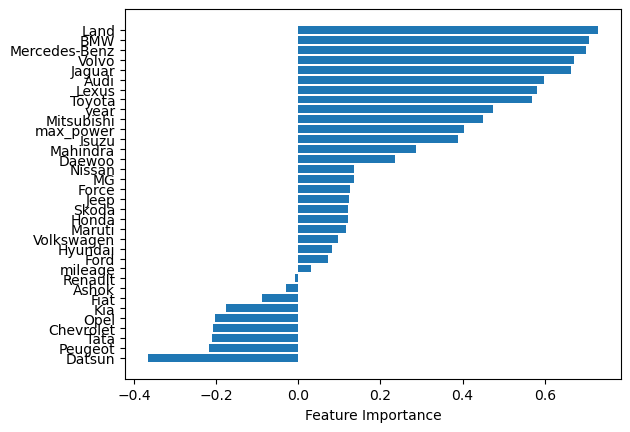

In [78]:
model.feature_importance()

# 9. Inference

## Save the model

In [79]:
import pickle

model_and_scaler = {
    'model': model,
    'scaler': scaler,
#     'brand_le': brand_le,
    'brand_ohe': brand_ohe,
    'default_values': default_values
}

file = open('car_prediction2.model', 'wb')
pickle.dump(model_and_scaler, file)
file.close()

## Load the Model and Make Inference with unknown data.

In [80]:
# Get a sample from the orinal dataset.
sample = original_df[['max_power', 'mileage', 'year', 'brand', 'selling_price']].loc[1]
sample

max_power        103.52
mileage           21.14
year               2014
brand             Skoda
selling_price    370000
Name: 1, dtype: object

In [81]:
import pickle

# Load Model
model_file = open('car_prediction2.model', 'rb');
load_model = pickle.load(model_file)
model = load_model['model']
scaler = load_model['scaler']
brand_ohe = load_model['brand_ohe']

In [82]:
brand_ohe.categories_[0]

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [83]:
# change some value accroding to the real value and check the result.
encoded_brand = list(brand_ohe.transform([['Skoda']]).toarray()[0])
sample = np.array([[103.52, 21.14, 2014] + encoded_brand])

sample[:, 0: 3] = scaler.transform(sample[:, 0: 3])
sample = np.insert(sample, 0, 1, axis=1)
sample

array([[1.        , 0.32416711, 0.43482181, 0.03449118, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ]])

In [84]:
print("Sample Shape", sample.shape)
print("Theta Shape:", model.theta.shape)

Sample Shape (1, 35)
Theta Shape: (35,)


In [85]:
# predict the selling_price
yhat = model.predict(sample)

# use exp function to get the real price. 
print(yhat)
np.exp(yhat)

[13.1406363]


array([509220.44894642])

# Assignment Report

### ML Flows records each model, each fold and each poch so that we can easily monitor the performance and convergence of our models.

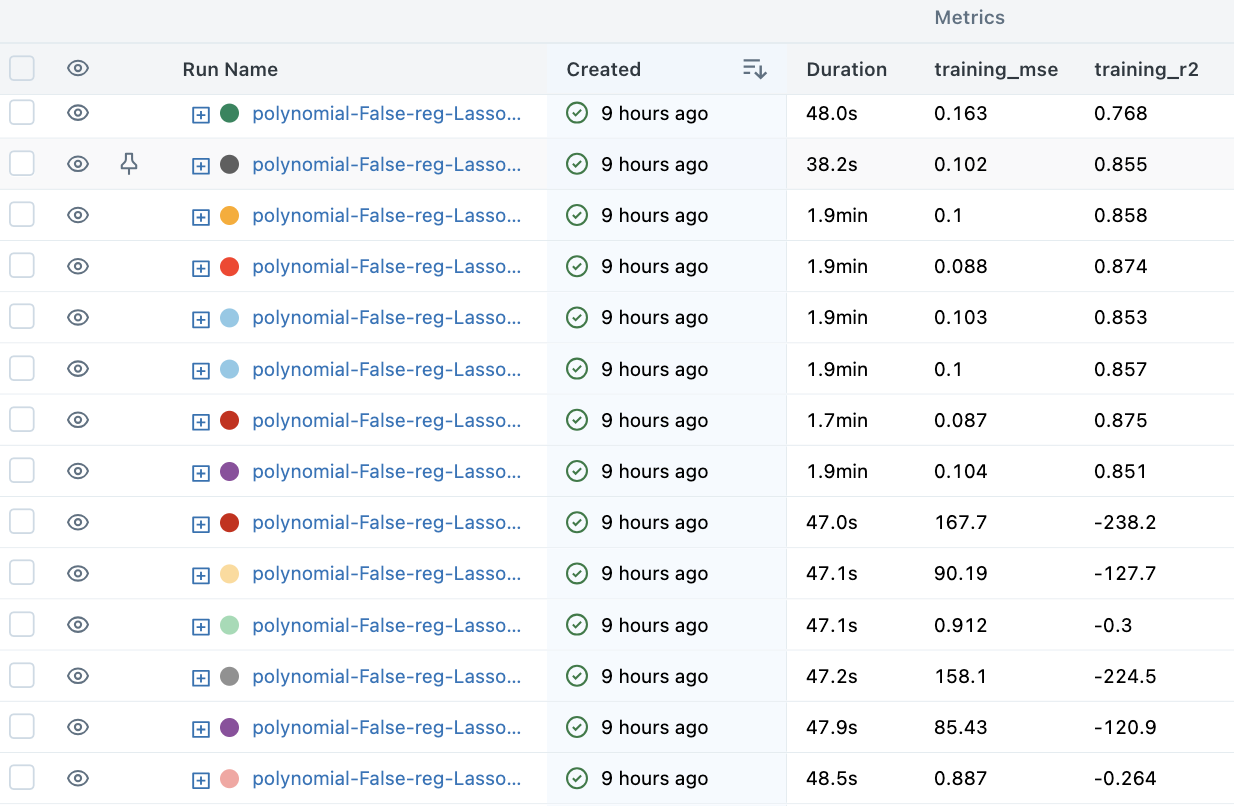


## Using various parameters and metric. I can find the best model that will provide lowest MSE and highest R2 score.

### Best Model with lowest MSE
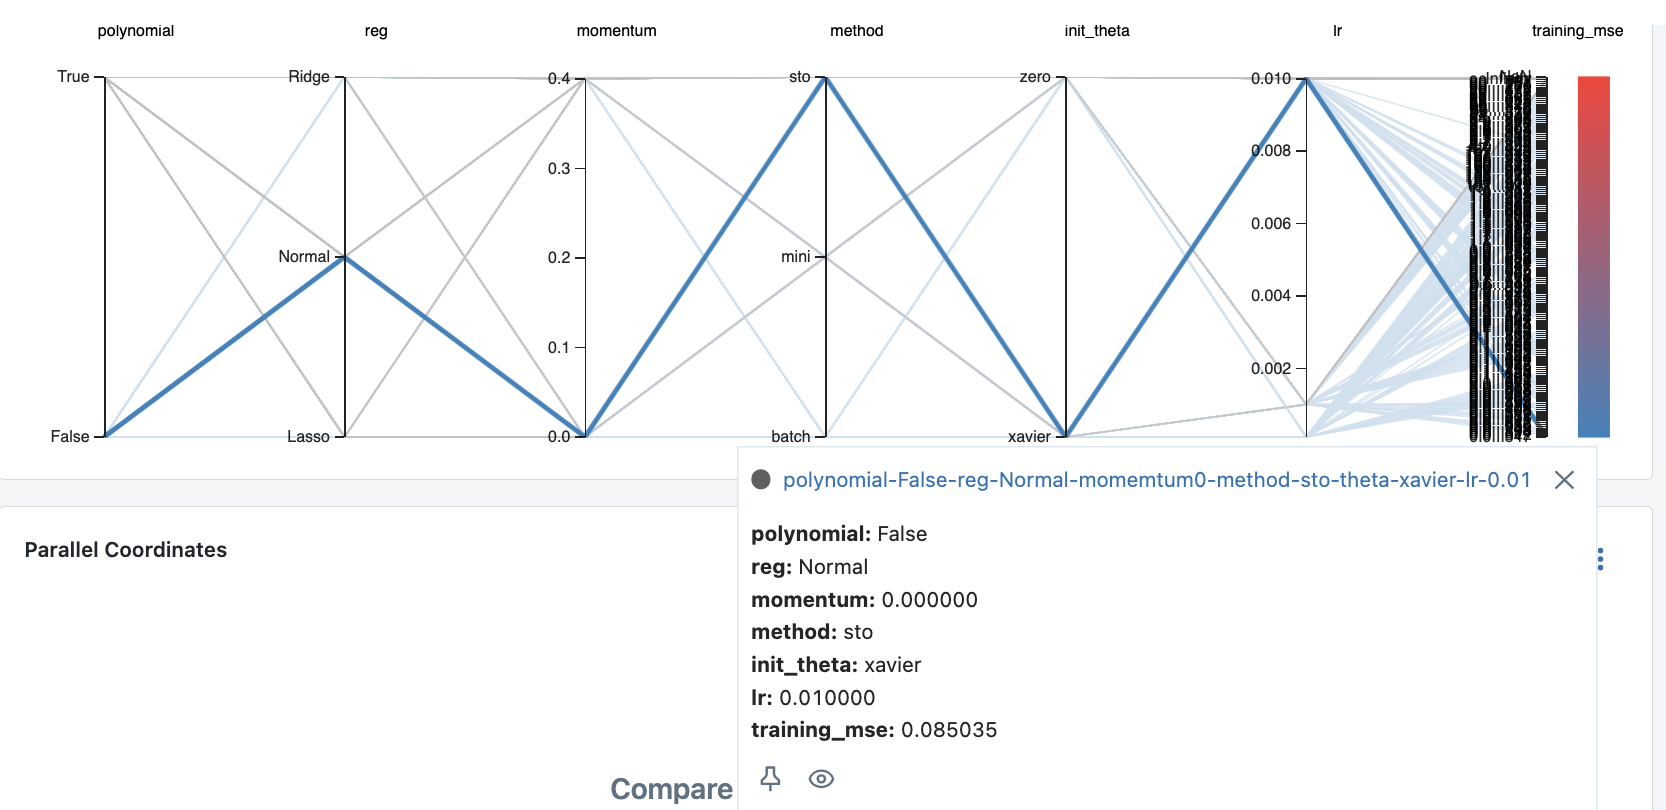

### Best Model with highest R2 score.

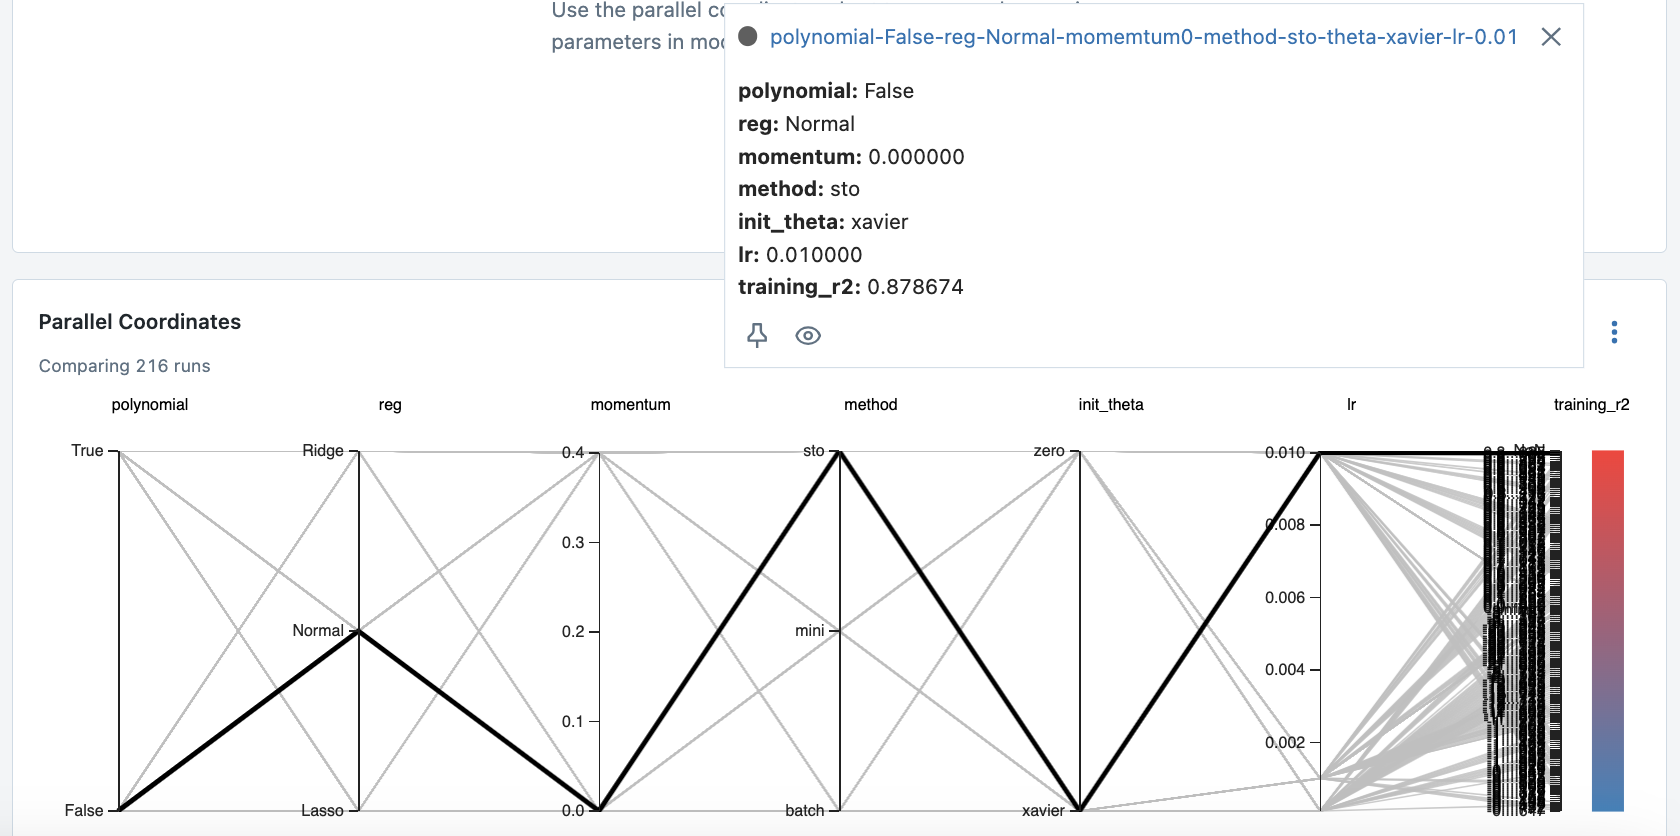

### Conclusion
- As you can see in the comparison, I got the same model for both MSE and R2 comparison.
- Polynomial doesn't helpful in this case or more complicated polynomial equation is required.
- xavier initialization, stochastic gradient descent and 0 momemtum are the best parameters for my model.
- No regularization is required in this example.